## **Introduction**
Flair is one of the popular libraries for doing NLP based tasks. In this notebook, I would like to explain the different ways in which we could train NER - Entity Recognitio model in flair. Embeddings, play a very crucial role when training NLP models,One of the advantages of Flair is the easiness in which we can try different types of embeddings. It provides an additional feature to even stack embeddings. In this case, as it is NER we will exploring mostly Word Embeddings. When we are going for tasks such as Text Classification, Topic Modeling it would worth exploring their sentence embeddings as well. If you want to understand more about embeddings, please explore the medium blog,<https://medium.com/mysuperai/what-is-named-entity-recognition-ner-and-how-can-i-use-it-2b68cf6f545d>. We will first begin by installing flair

In [1]:
 !pip install --quiet flair

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.21.0 requires importlib-metadata>=4.8.1; python_version < "3.8", but you have importlib-metadata 3.10.1 which is incompatible.


We will be first downloading the datasets to explain this functionality. I will be using the Japanese NER dataset that comes with Flair for this notebook.

In [2]:
from flair.data import Corpus
import flair.datasets
japanese_ner_corpus = flair.datasets.NER_JAPANESE()

2021-12-01 07:55:30,951 https://raw.githubusercontent.com/Hironsan/IOB2Corpus/master/hironsan.txt not found in cache, downloading to /tmp/tmpmw3hxb_d


883011B [00:00, 60428732.23B/s]          

2021-12-01 07:55:31,067 copying /tmp/tmpmw3hxb_d to cache at /root/.flair/datasets/ner_japanese/raw/hironsan.txt
2021-12-01 07:55:31,071 removing temp file /tmp/tmpmw3hxb_d


2021-12-01 07:55:31,499 https://raw.githubusercontent.com/Hironsan/IOB2Corpus/master/ja.wikipedia.conll not found in cache, downloading to /tmp/tmphu3ih2tu


1297592B [00:00, 45706448.17B/s]         

2021-12-01 07:55:31,628 copying /tmp/tmphu3ih2tu to cache at /root/.flair/datasets/ner_japanese/raw/ja.wikipedia.conll
2021-12-01 07:55:31,633 removing temp file /tmp/tmphu3ih2tu
2021-12-01 07:55:31,747 Reading data from /root/.flair/datasets/ner_japanese
2021-12-01 07:55:31,747 Train: /root/.flair/datasets/ner_japanese/train.txt
2021-12-01 07:55:31,748 Dev: None
2021-12-01 07:55:31,749 Test: None


In [3]:
label_dict = japanese_ner_corpus.make_label_dictionary(label_type='ner')

print('The number of training examples in the dataset are',len(japanese_ner_corpus.train))
print('The number of test examples in the dataset are',len(japanese_ner_corpus.test))
print('The first training example is', japanese_ner_corpus.train[0])

print('-------------------The tags in the dataset are----------------')
print(label_dict)

2021-12-01 07:55:35,144 Computing label dictionary. Progress:


100%|██████████| 3621/3621 [00:00<00:00, 7657.28it/s]

2021-12-01 07:55:35,642 Corpus contains the labels: ner (#127986)
2021-12-01 07:55:35,642 Created (for label 'ner') Dictionary with 77 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-DAT, E-DAT, I-LOC, B-ORG, I-ORG, E-ORG, S-ORG, I-DAT, B-ART, I-ART, E-ART, S-ART, B-PSN, I-PSN, E-PSN, S-TIM, B-TIM, I-TIM, E-TIM, S-PSN, S-DAT, B-MNY, I-MNY, E-MNY, S-PNT, B-PNT, E-PNT, I-PNT, B-DATE, E-DATE, B-PERSON, I-PERSON, E-PERSON, S-PERSON, S-ARTIFACT, S-LOCATION, B-NUMBER, I-NUMBER, E-NUMBER, B-TIME, I-TIME, E-TIME, B-ARTIFACT, E-ARTIFACT, B-ORGANIZATION
The number of training examples in the dataset are 3621
The number of test examples in the dataset are 447
The first training example is Sentence: "また 既存 2 カ所 の 自然 遺産 の 登録 範囲 の 拡張 が 認め られ た 。"   [− Tokens: 17]
-------------------The tags in the dataset are----------------
Dictionary with 77 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-DAT, E-DAT, I-LOC, B-ORG, I-ORG, E-ORG, S-ORG, I-DAT, B-ART, I-ART, E-ART, S-ART, B-PSN, I-PSN, E-PSN, S-TIM, B-TIM, I-TIM, E-TI

I tried wit a few different types of embeddings and checked the F1 Score. I tried ja embeddings, ja-crawl embedding and then also stacking these with Flair embeddings.
At the end of 20 epochs, we have reached a F1 score of -.025 with ja. Here when using the ja-crawl embeddings we were able to reach a F1 score of 0.64 within 20 epochs. The best results came with stacking ja-crawl on top of Flair. So we will be going with that.

These are the following steps,
* Declare the label type
* Create the label dictionary
* Declare the embeddings
* Instantiate the Sequence Tagger
* Instantiate the trainer
* Train the model.

In [4]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize embedding stack with Flair and GloVe
embedding_types = [
    WordEmbeddings('ja-crawl'),
    FlairEmbeddings('multi-forward'),
    FlairEmbeddings('multi-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)

2021-12-01 07:55:35,742 Computing label dictionary. Progress:


100%|██████████| 3621/3621 [00:00<00:00, 7671.73it/s]

2021-12-01 07:55:36,218 Corpus contains the labels: ner (#127986)
2021-12-01 07:55:36,218 Created (for label 'ner') Dictionary with 77 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-DAT, E-DAT, I-LOC, B-ORG, I-ORG, E-ORG, S-ORG, I-DAT, B-ART, I-ART, E-ART, S-ART, B-PSN, I-PSN, E-PSN, S-TIM, B-TIM, I-TIM, E-TIM, S-PSN, S-DAT, B-MNY, I-MNY, E-MNY, S-PNT, B-PNT, E-PNT, I-PNT, B-DATE, E-DATE, B-PERSON, I-PERSON, E-PERSON, S-PERSON, S-ARTIFACT, S-LOCATION, B-NUMBER, I-NUMBER, E-NUMBER, B-TIME, I-TIME, E-TIME, B-ARTIFACT, E-ARTIFACT, B-ORGANIZATION


2021-12-01 07:55:37,387 https://flair.informatik.hu-berlin.de/resources/embeddings/token/ja-crawl-fasttext-300d-1M.vectors.npy not found in cache, downloading to /tmp/tmpa4t5j6wp


100%|██████████| 1200000128/1200000128 [01:15<00:00, 15914992.66B/s]

2021-12-01 07:56:53,323 copying /tmp/tmpa4t5j6wp to cache at /root/.flair/embeddings/ja-crawl-fasttext-300d-1M.vectors.npy


2021-12-01 07:56:54,608 removing temp file /tmp/tmpa4t5j6wp
2021-12-01 07:56:55,297 https://flair.informatik.hu-berlin.de/resources/embeddings/token/ja-crawl-fasttext-300d-1M not found in cache, downloading to /tmp/tmpspprkdwe


100%|██████████| 44659952/44659952 [00:03<00:00, 12368830.47B/s]

2021-12-01 07:56:59,445 copying /tmp/tmpspprkdwe to cache at /root/.flair/embeddings/ja-crawl-fasttext-300d-1M
2021-12-01 07:56:59,495 removing temp file /tmp/tmpspprkdwe


2021-12-01 07:57:15,787 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-forward-v0.1.pt not found in cache, downloading to /tmp/tmpqob922x8


100%|██████████| 172513724/172513724 [00:10<00:00, 16634773.50B/s]

2021-12-01 07:57:26,732 copying /tmp/tmpqob922x8 to cache at /root/.flair/embeddings/lm-jw300-forward-v0.1.pt
2021-12-01 07:57:26,914 removing temp file /tmp/tmpqob922x8


2021-12-01 07:57:34,533 https://flair.informatik.hu-berlin.de/resources/embeddings/flair/lm-jw300-backward-v0.1.pt not found in cache, downloading to /tmp/tmp6e0gq5xs


100%|██████████| 172513724/172513724 [00:10<00:00, 16762115.17B/s]

2021-12-01 07:57:45,425 copying /tmp/tmp6e0gq5xs to cache at /root/.flair/embeddings/lm-jw300-backward-v0.1.pt
2021-12-01 07:57:45,610 removing temp file /tmp/tmp6e0gq5xs


The train method accepts many parameters - optimiser, learning rate, learning rate scheduler, evaluation metric and so on. Some of the important parameters are,
* **base_path**: Main path to which all output during training is logged and models are saved
* **learning_rate**: Initial learning rate (or max, if scheduler is OneCycleLR)
* **mini_batch_size**: Size of mini-batches during training
* **mini_batch_chunk_size**: If mini-batches are larger than this number, they get broken down into chunks of this size for processing purposes
* **max_epochs**: Maximum number of epochs to train. Terminates training if this number is surpassed.
* **scheduler**: The learning rate scheduler to use
* **patience**: Patience is the number of epochs with no improvement the Trainer waits
* **embeddings_storage_mode**: One of 'none' (all embeddings are deleted and freshly recomputed),'cpu' (embeddings are stored on CPU) or 'gpu' (embeddings are stored on GPU)
* **shuffle**: If True, data is shuffled during training
* **main_evaluation_metric**: Type of metric to use for best model tracking and learning rate scheduling. Default values will be Accuracy, F1 Score.
* **optimizer**: The optimizer to use (typically SGD or Adam)
* **use_tensorboard**: If True, writes out tensorboard information
* **tensorboard_log_dir**: Directory into which tensorboard log files will be written
* **metrics_for_tensorboard**: List of tuples that specify which metrics (in addition to the main_score) shall be plotted in tensorboard, could be [("macro avg", 'f1-score'), ("macro avg", 'precision')] 
       

In [5]:
from torch.optim import SGD 
# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl-stacked',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=20, 
              optimizer = SGD)

2021-12-01 07:57:47,490 ----------------------------------------------------------------------------------------------------
2021-12-01 07:57:47,492 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'ja-crawl'
      (embedding): Embedding(1000001, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=4396, out_featur

{'test_score': 0.6493137718883105,
 'dev_score_history': [0.1363258520365752,
  0.2155688622754491,
  0.3242134062927497,
  0.3619315518049695,
  0.4388185654008439,
  0.3460972017673049,
  0.4841463414634147,
  0.49459920409323477,
  0.529118136439268,
  0.5225626740947076,
  0.5213224724484907,
  0.5709892362890825,
  0.5859740259740259,
  0.5253512522907757,
  0.5581668625146886,
  0.5702730030333671,
  0.5819631290483308,
  0.6128863279203771,
  0.6045769026077701,
  0.6227608008429926],
 'train_loss_history': [0.88785037824791,
  0.6177773722064624,
  0.5033916434462581,
  0.43638817332918434,
  0.3922534913000204,
  0.35849796322765987,
  0.33147039084547547,
  0.30884333163406225,
  0.29116813193866325,
  0.2755405322957687,
  0.2612568552147969,
  0.2456593127133908,
  0.2315057837346315,
  0.22386666256885213,
  0.21381889005743304,
  0.20645149571575228,
  0.2006391138064234,
  0.17572281204258683,
  0.1702734407857674,
  0.16747074563252937],
 'dev_loss_history': [tensor(1.0

2021-12-01 08:10:09,914 ----------------------------------------------------------------------------------------------------
2021-12-01 08:10:09,914 WARNING: No LOSS found for test split in this data.
2021-12-01 08:10:09,915 Are you sure you want to plot LOSS and not another value?
2021-12-01 08:10:09,916 ----------------------------------------------------------------------------------------------------
2021-12-01 08:10:09,949 ----------------------------------------------------------------------------------------------------
2021-12-01 08:10:09,949 WARNING: No F1 found for test split in this data.
2021-12-01 08:10:09,950 Are you sure you want to plot F1 and not another value?
2021-12-01 08:10:09,950 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-stacked/training.png


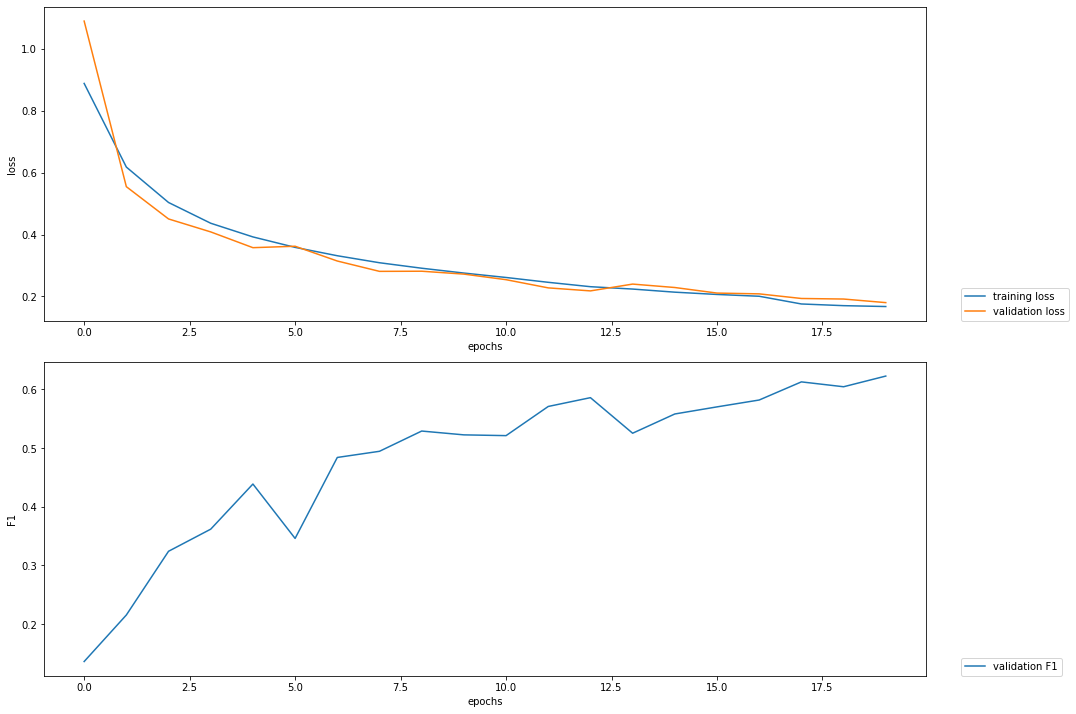

In [6]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-stacked/loss.tsv')

We can see the model is constantly improving without overfitting. So we will go ahead and train it for a more epochs. This time we will try to use tensorboard.

In [7]:
from torch.optim import SGD 
# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl-stacked',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=50, 
              optimizer = SGD,
             write_weights=True,
             use_tensorboard=True,
             tensorboard_log_dir='/kaggle/working/resources/tensor')

2021-12-01 08:10:12,911 tensorboard logging path is /kaggle/working/resources/tensor
2021-12-01 08:10:12,913 ----------------------------------------------------------------------------------------------------
2021-12-01 08:10:12,914 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'ja-crawl'
      (embedding): Embedding(1000001, 300)
    )
    (list_embedding_1): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.1, inplace=False)
        (encoder): Embedding(11854, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=11854, bias=True)
      )
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked

/opt/conda/lib/python3.7/site-packages/flair/trainers/trainer.py:65: UserWarning: There should be no best model saved at epoch 1 except there is a model from previous trainings in your training folder. All previous best models will be deleted.
  "There should be no best model saved at epoch 1 except there is a model from previous trainings"


2021-12-01 08:10:15,160 epoch 1 - iter 11/114 - loss 0.29046909 - samples/sec: 169.40 - lr: 0.100000
2021-12-01 08:10:17,476 epoch 1 - iter 22/114 - loss 0.24051017 - samples/sec: 153.60 - lr: 0.100000
2021-12-01 08:10:20,074 epoch 1 - iter 33/114 - loss 0.20944848 - samples/sec: 136.54 - lr: 0.100000
2021-12-01 08:10:22,920 epoch 1 - iter 44/114 - loss 0.19163523 - samples/sec: 124.55 - lr: 0.100000
2021-12-01 08:10:25,735 epoch 1 - iter 55/114 - loss 0.18456691 - samples/sec: 126.06 - lr: 0.100000
2021-12-01 08:10:28,186 epoch 1 - iter 66/114 - loss 0.17494353 - samples/sec: 144.83 - lr: 0.100000
2021-12-01 08:10:30,763 epoch 1 - iter 77/114 - loss 0.16919367 - samples/sec: 137.76 - lr: 0.100000
2021-12-01 08:10:33,336 epoch 1 - iter 88/114 - loss 0.16598915 - samples/sec: 138.11 - lr: 0.100000
2021-12-01 08:10:36,084 epoch 1 - iter 99/114 - loss 0.16448538 - samples/sec: 129.09 - lr: 0.100000
2021-12-01 08:10:38,505 epoch 1 - iter 110/114 - loss 0.16318002 - samples/sec: 146.62 - lr

{'test_score': 0.7564494971578487,
 'dev_score_history': [0.5830441249380268,
  0.6178781925343811,
  0.6349869451697127,
  0.6291126620139581,
  0.583856935717738,
  0.6412930135557873,
  0.6402502606882169,
  0.6490409538621047,
  0.6482334869431643,
  0.6602870813397129,
  0.6598712446351932,
  0.6457544618712818,
  0.6709816612729234,
  0.6613226452905813,
  0.6436285097192225,
  0.6815816857440167,
  0.6577367205542726,
  0.6876208897485494,
  0.6630611141157381,
  0.6924583741429972,
  0.6586190246257847,
  0.6557722720084344,
  0.6716049382716051,
  0.6742966142107774,
  0.7068114511352418,
  0.7177497575169738,
  0.7190361445783132,
  0.691793893129771,
  0.7116504854368932,
  0.7099311701081613,
  0.7223300970873787,
  0.7207729468599035,
  0.7271825396825397,
  0.7133941430628902,
  0.7154873824839189,
  0.7071984435797666,
  0.7129094412331407,
  0.7165668662674651,
  0.7160852713178294,
  0.7342016401350699,
  0.7261146496815286,
  0.7266503667481663,
  0.7223035627135188,


2021-12-01 08:38:09,463 ----------------------------------------------------------------------------------------------------
2021-12-01 08:38:09,464 WARNING: No LOSS found for test split in this data.
2021-12-01 08:38:09,465 Are you sure you want to plot LOSS and not another value?
2021-12-01 08:38:09,466 ----------------------------------------------------------------------------------------------------
2021-12-01 08:38:09,489 ----------------------------------------------------------------------------------------------------
2021-12-01 08:38:09,490 WARNING: No F1 found for test split in this data.
2021-12-01 08:38:09,491 Are you sure you want to plot F1 and not another value?
2021-12-01 08:38:09,492 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-stacked/training.png


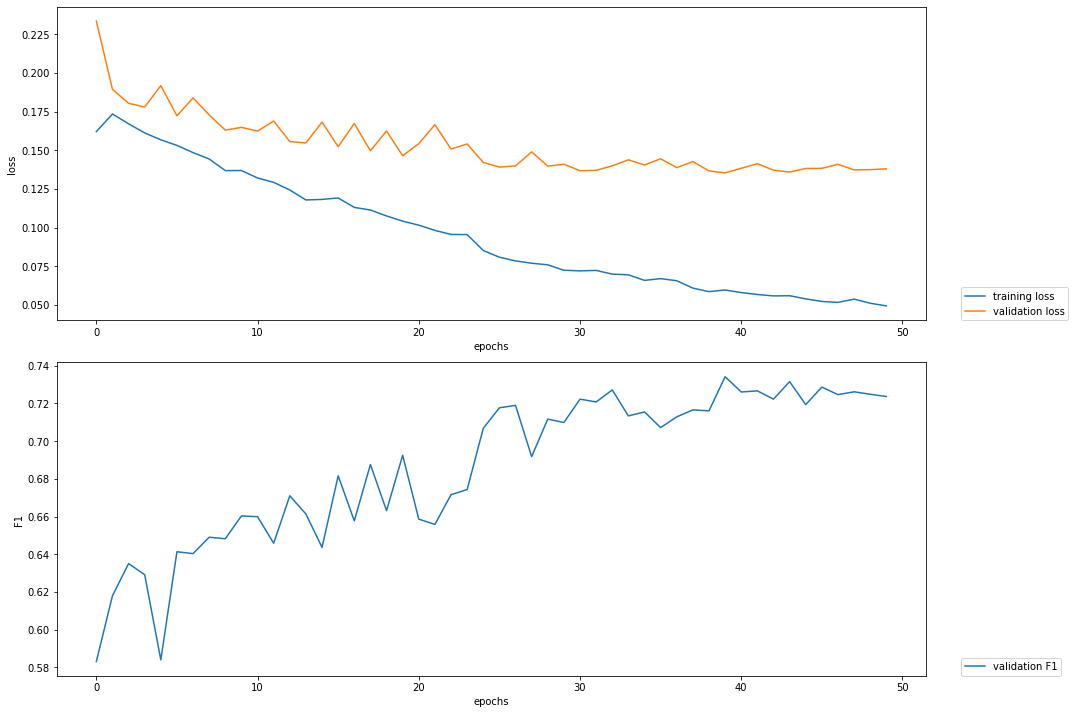

In [8]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-stacked/loss.tsv')

Here we can see that while the training worked nicely for about 20 epochs, but it then started over-fitting. So i am going to try a simpler embedding

In [9]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize embedding stack with Flair and GloVe
embedding_types = [
    WordEmbeddings('ja-crawl'),
#     FlairEmbeddings('multi-forward'),
#     FlairEmbeddings('multi-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_crf=True)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)
from torch.optim import SGD 
# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=75, 
              optimizer = SGD,
             write_weights=True,
             use_tensorboard=True,
             tensorboard_log_dir='/kaggle/working/resources/tensor')

2021-12-01 08:38:13,423 Computing label dictionary. Progress:


100%|██████████| 3621/3621 [00:00<00:00, 7698.32it/s]

2021-12-01 08:38:13,900 Corpus contains the labels: ner (#127986)
2021-12-01 08:38:13,902 Created (for label 'ner') Dictionary with 77 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-DAT, E-DAT, I-LOC, B-ORG, I-ORG, E-ORG, S-ORG, I-DAT, B-ART, I-ART, E-ART, S-ART, B-PSN, I-PSN, E-PSN, S-TIM, B-TIM, I-TIM, E-TIM, S-PSN, S-DAT, B-MNY, I-MNY, E-MNY, S-PNT, B-PNT, E-PNT, I-PNT, B-DATE, E-DATE, B-PERSON, I-PERSON, E-PERSON, S-PERSON, S-ARTIFACT, S-LOCATION, B-NUMBER, I-NUMBER, E-NUMBER, B-TIME, I-TIME, E-TIME, B-ARTIFACT, E-ARTIFACT, B-ORGANIZATION


2021-12-01 08:38:36,690 tensorboard logging path is /kaggle/working/resources/tensor
2021-12-01 08:38:36,702 ----------------------------------------------------------------------------------------------------
2021-12-01 08:38:36,703 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'ja-crawl'
      (embedding): Embedding(1000001, 300)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=300, out_features=300, bias=True)
  (rnn): LSTM(300, 256, batch_first=True, bidirectional=True)
  (linear): Linear(in_features=512, out_features=79, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-12-01 08:38:36,704 ----------------------------------------------------------------------------------------------------
2021-12-01 08:38:36,705 Corpus: "Corpus: 3621 train + 402 dev + 447 test sentences"
2021-12-01 08:38:36,706 ------------------------------

{'test_score': 0.7537511032656663,
 'dev_score_history': [0.04996214988644966,
  0.14688427299703263,
  0.32286432160804024,
  0.38741517581739665,
  0.4680610514414924,
  0.4844417327638803,
  0.5284861638632663,
  0.5658747300215983,
  0.5691139240506328,
  0.6108527131782946,
  0.5858021240916714,
  0.6015857284440039,
  0.6228855721393034,
  0.609951845906902,
  0.6440339490763854,
  0.6193548387096774,
  0.6373626373626373,
  0.6221979223619464,
  0.6537678207739307,
  0.6732575383094415,
  0.6713078070611636,
  0.656926952141058,
  0.6768935762224352,
  0.6703078450844091,
  0.6744982868330885,
  0.6974708171206226,
  0.6879432624113475,
  0.7072205736894165,
  0.6851311953352769,
  0.6753112033195021,
  0.6890052356020943,
  0.698914116485686,
  0.7192118226600986,
  0.7007874015748031,
  0.7101669195751137,
  0.7027285782671134,
  0.7100050787201625,
  0.7209533267130088,
  0.7123420796890184,
  0.729,
  0.7239324726911619,
  0.7203931203931203,
  0.7257671699951291,
  0.723920

2021-12-01 09:04:53,695 ----------------------------------------------------------------------------------------------------
2021-12-01 09:04:53,696 WARNING: No LOSS found for test split in this data.
2021-12-01 09:04:53,697 Are you sure you want to plot LOSS and not another value?
2021-12-01 09:04:53,697 ----------------------------------------------------------------------------------------------------
2021-12-01 09:04:53,722 ----------------------------------------------------------------------------------------------------
2021-12-01 09:04:53,723 WARNING: No F1 found for test split in this data.
2021-12-01 09:04:53,724 Are you sure you want to plot F1 and not another value?
2021-12-01 09:04:53,725 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/training.png


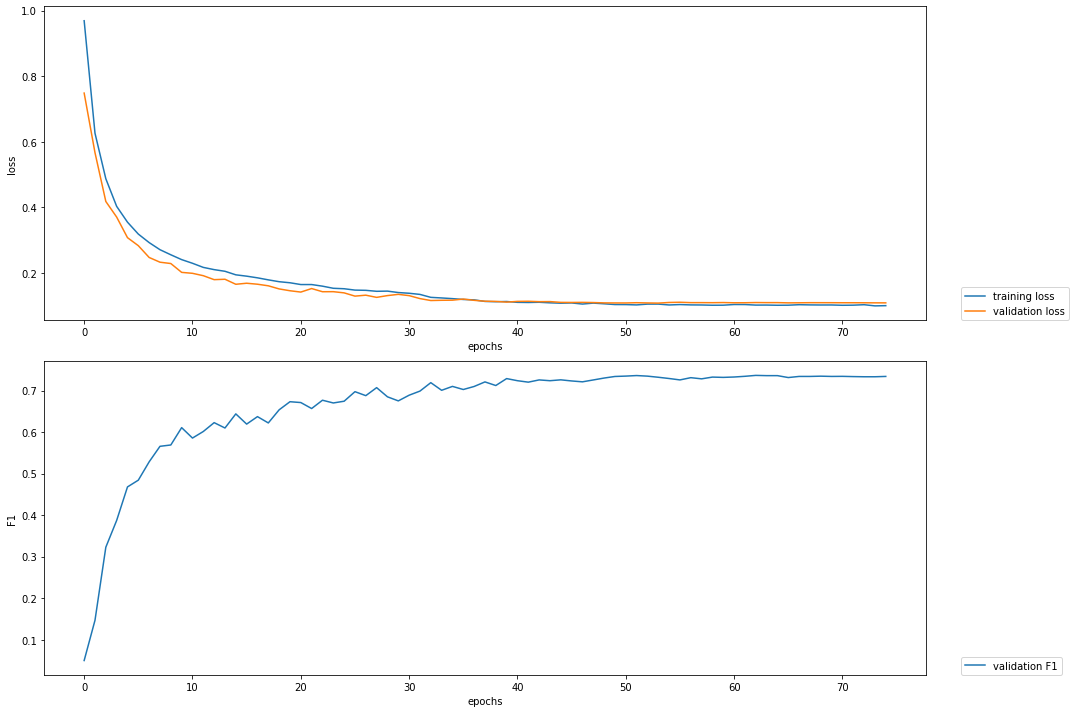

In [10]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl/loss.tsv')

Here from the graph we can see the over-fitting has reduced completely, but the minimum loss that we can reach is close 0.1 the model is not able to go further down with these configurations. One important item to note is that, while we started with a learning rate of 0.1 and during the final iterations it went down to 0.000195. This is because flair, using a learning schedule AnnealOnPlateau so the moment it encounters a plateau it reduces the learning rate by 1/2 and looks for the minima.
Finally, I am going to change the Sequence Tagger attributes and see if any of them generates better model.
The last sequence tagger used crf now we will try with a RNN on the embeddings to see if there is any improvement.

As per the Flair documentation, Sequence Tagger provides us with the following options,
* **hidden_size**: number of hidden states in RNN
* **embeddings**: word embeddings used in tagger
* **tag_dictionary**: dictionary of tags you want to predict
* **tag_type**: string identifier for tag type
* **use_crf**: if True use CRF decoder, else project directly to tag space
* **use_rnn**: if True use RNN layer, otherwise use word embeddings directly
* **rnn_layers**: number of RNN layers
* **dropout**: dropout probability
* **word_dropout**: word dropout probability

In [11]:
from flair.datasets import CONLL_03
from flair.embeddings import WordEmbeddings, FlairEmbeddings, StackedEmbeddings
from flair.models import SequenceTagger
from flair.trainers import ModelTrainer

# 2. what label do we want to predict?
label_type = 'ner'

# 3. make the label dictionary from the corpus
label_dict = japanese_ner_corpus.make_label_dictionary(label_type=label_type)

# 4. initialize embedding stack with Flair and GloVe
embedding_types = [
    WordEmbeddings('ja-crawl'),
#     FlairEmbeddings('multi-forward'),
#     FlairEmbeddings('multi-backward')
]

embeddings = StackedEmbeddings(embeddings=embedding_types)

# 5. initialize sequence tagger
tagger = SequenceTagger(hidden_size=256,
                        embeddings=embeddings,
                        tag_dictionary=label_dict,
                        tag_type=label_type,
                        use_rnn=True,
                       rnn_layers=5)

# 6. initialize trainer
trainer = ModelTrainer(tagger, japanese_ner_corpus)
from torch.optim import SGD 
# 7. start training
trainer.train('resources/taggers/sota-ner-flair/ja-crawl-rnn',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=75, 
              optimizer = SGD,
             write_weights=True,
             use_tensorboard=True,
             tensorboard_log_dir='/kaggle/working/resources/tensor')

2021-12-01 09:05:00,748 Computing label dictionary. Progress:


100%|██████████| 3621/3621 [00:00<00:00, 6827.70it/s]

2021-12-01 09:05:01,284 Corpus contains the labels: ner (#127986)
2021-12-01 09:05:01,285 Created (for label 'ner') Dictionary with 77 tags: <unk>, O, B-LOC, E-LOC, S-LOC, B-DAT, E-DAT, I-LOC, B-ORG, I-ORG, E-ORG, S-ORG, I-DAT, B-ART, I-ART, E-ART, S-ART, B-PSN, I-PSN, E-PSN, S-TIM, B-TIM, I-TIM, E-TIM, S-PSN, S-DAT, B-MNY, I-MNY, E-MNY, S-PNT, B-PNT, E-PNT, I-PNT, B-DATE, E-DATE, B-PERSON, I-PERSON, E-PERSON, S-PERSON, S-ARTIFACT, S-LOCATION, B-NUMBER, I-NUMBER, E-NUMBER, B-TIME, I-TIME, E-TIME, B-ARTIFACT, E-ARTIFACT, B-ORGANIZATION


2021-12-01 09:05:27,538 tensorboard logging path is /kaggle/working/resources/tensor
2021-12-01 09:05:27,545 ----------------------------------------------------------------------------------------------------
2021-12-01 09:05:27,546 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      'ja-crawl'
      (embedding): Embedding(1000001, 300)
    )
  )
  (word_dropout): WordDropout(p=0.05)
  (locked_dropout): LockedDropout(p=0.5)
  (embedding2nn): Linear(in_features=300, out_features=300, bias=True)
  (rnn): LSTM(300, 256, num_layers=5, batch_first=True, dropout=0.5, bidirectional=True)
  (linear): Linear(in_features=512, out_features=79, bias=True)
  (beta): 1.0
  (weights): None
  (weight_tensor) None
)"
2021-12-01 09:05:27,549 ----------------------------------------------------------------------------------------------------
2021-12-01 09:05:27,550 Corpus: "Corpus: 3621 train + 402 dev + 447 test sentences"
2021-12-01 09:05:27,551 ---

{'test_score': 0.7297176154190946,
 'dev_score_history': [0.0,
  0.0,
  0.0,
  0.0,
  0.029335634167385678,
  0.127129750982962,
  0.10369068541300527,
  0.21650165016501652,
  0.29821717990275526,
  0.3263327948303716,
  0.3400900900900901,
  0.36926360725720386,
  0.3640579710144928,
  0.3663366336633663,
  0.3986486486486487,
  0.37343096234309625,
  0.36254107338444697,
  0.3792048929663609,
  0.41460541813898705,
  0.41542416452442166,
  0.4298850574712644,
  0.44550264550264546,
  0.4612885760693015,
  0.435,
  0.4672,
  0.46655965757089357,
  0.4609503003823048,
  0.496929089893914,
  0.5304777594728173,
  0.5155863433943593,
  0.5415415415415415,
  0.5347432024169184,
  0.5405684754521963,
  0.57,
  0.5654345654345654,
  0.563710499490316,
  0.5855263157894737,
  0.5970603142422706,
  0.6012024048096192,
  0.5926294820717133,
  0.5883524141363863,
  0.6032852165256347,
  0.6094154164511123,
  0.588469184890656,
  0.5944862155388472,
  0.6183165696135521,
  0.6276276276276276,
 

2021-12-01 09:46:03,365 ----------------------------------------------------------------------------------------------------
2021-12-01 09:46:03,366 WARNING: No LOSS found for test split in this data.
2021-12-01 09:46:03,367 Are you sure you want to plot LOSS and not another value?
2021-12-01 09:46:03,367 ----------------------------------------------------------------------------------------------------
2021-12-01 09:46:03,398 ----------------------------------------------------------------------------------------------------
2021-12-01 09:46:03,398 WARNING: No F1 found for test split in this data.
2021-12-01 09:46:03,399 Are you sure you want to plot F1 and not another value?
2021-12-01 09:46:03,400 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in /kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-rnn/training.png


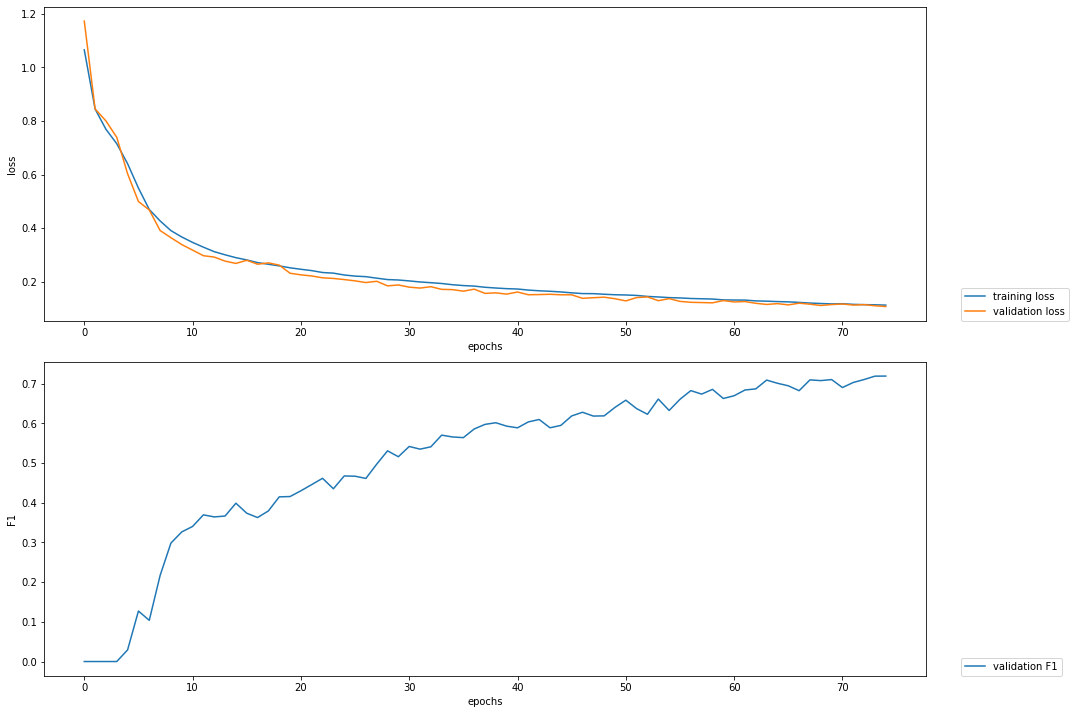

In [12]:
# visualize
from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/kaggle/working/resources/taggers/sota-ner-flair/ja-crawl-rnn/loss.tsv')

## Conclusion
We can see that the RNN gave similar results to CRF. But CRF was better than RNN model. We could finetune more parameters in the RNN and seen if they give better results. But we will also need more data to take the model accuracy even further. This is how we can train a NER Model using Flair. We get a lot of options to play around with the embeddings and also we could use RNN/CRF on the embeddings to refine them even further.